# Homework # 2 - Linear Regression
Data file: salaries.csv

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load data

In [2]:
! pwd

/Users/amarisefthimiou/CIS3920


In [3]:
! head 'data/salaries.csv'

In [4]:
df = pd.read_csv('data/salaries.csv')

### Examine data

In [5]:
df.shape

(30, 2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

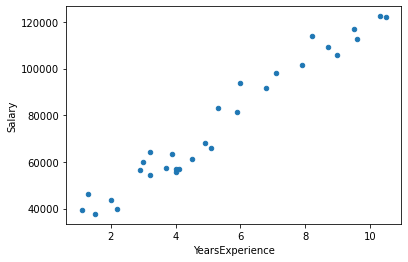

In [6]:
df.plot.scatter("YearsExperience", "Salary")

### Separate independent and dependent variables
* Independent variable: YearsExperience
* Dependent variable: Salary

In [9]:
x_years_experience = df.iloc[:, :-1].values #all but last column
y_salary = df.iloc[:, -1].values #last column

### Split data into training and test sets

In [10]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_years_experience, y_salary, test_size = 0.3,random_state = 0)
print(x_train_1.shape)
print(x_test_1.shape)

(21, 1)
(9, 1)


### Train a Linear Regression model on the training set

In [11]:
model = LinearRegression()
model.fit(x_train_1, y_train_1)

LinearRegression()

### Predict the test set results

In [12]:
y_pred_1 = model.predict(x_test_1)
y_pred_1

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [13]:
y_train_predict_1 = model.predict(x_train_1)
mse = mean_squared_error(y_train_1, y_train_predict_1)
rmse = np.sqrt(mse)

r2 = round(model.score(x_train_1, y_train_1),2)

print("Simple model performance for training set")
print("-----------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 (model) score is {}'.format(r2))

Simple model performance for training set
-----------------------------------------
MSE is 35116032.63186061
RMSE is 5925.878216084145
R2 (model) score is 0.94


In [14]:
y_pred_1 = model.predict(x_test_1)
mse = mean_squared_error(y_test_1, y_pred_1)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_1, y_test_1),2)

print("Simple model performance for test set")
print("-------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 (model) score is {}'.format(r2))

Simple model performance for test set
-------------------------------------
MSE is 23370078.800832972
RMSE is 4834.260936361728
R2 (model) score is 0.97


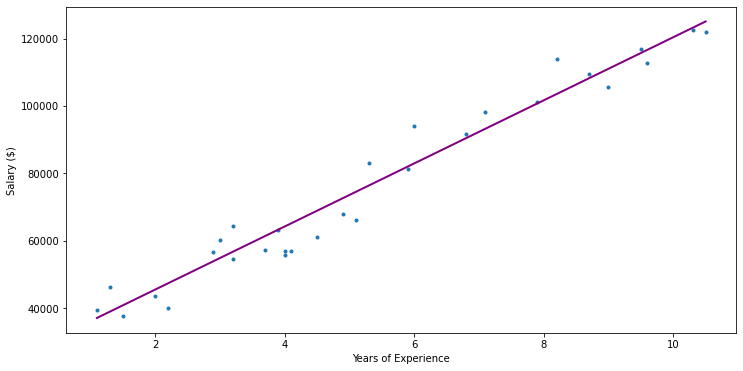

In [15]:
plt.figure(figsize=(12, 6))
prediction_space = np.linspace(min(x_years_experience), max(x_years_experience)).reshape(-1,1) 
plt.scatter(x_years_experience, y_salary, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'purple', linewidth = 2)
plt.ylabel('Salary ($)')
plt.xlabel('Years of Experience')
plt.show()